In [45]:
import matplotlib.pyplot as plt 
import numpy as np 

Definition of the k_armed bandit with eps sampling strategy

In [46]:
def k_armed_bandit(k, num_of_iter, eps, means, std_dev, eps_decay=None):
    all_values = np.zeros((k, num_of_iter))
    no_of_samples = np.zeros(k)
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)

    for i in range(k):
        all_values[i][0] = np.random.normal(loc=means[i], scale=std_dev[i])
        no_of_samples[i] += 1

    total_reward[0] = np.sum(all_values[0, :], axis=0)
    total_regret[0] = k * np.max(means) - total_reward[0]

    if eps_decay is None: 
        eps_decay = lambda i, num_of_iterations, eps: eps

    for i in range(1, num_of_iter):
        eps_yes_no = np.random.uniform(0,1)
        if eps_yes_no <= eps_decay(i, num_of_iter, eps): 
            current_bandit = int(np.floor(np.random.uniform(0,1) * k))
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        else: 
            current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        
        total_reward[i] = total_reward[i-1] + all_values[current_bandit, i]
        total_regret[i] = total_regret[i-1] + (np.max(means) - all_values[current_bandit, i])
    print(no_of_samples)
    return all_values, total_reward, total_regret

Some initial parameters that we tried 

In [56]:
k = 4 
num_of_iter = 10000
eps = 0.1 
means = np.array([3.5, 3, 2, 1])
std_dev = np.array([4, 0.5, 1, 6])

num_of_avg = 10

Running the multi-armed Bandit num_of_avg times to determine trustfull results

In [48]:
all_values = np.zeros((k, num_of_iter))
total_reward = np.zeros(num_of_iter)
total_regret = np.zeros(num_of_iter)

for i in range(num_of_avg):
    all_values_i, total_reward_i, total_regret_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev)
    all_values += all_values_i
    total_reward += total_reward_i
    total_regret += total_regret_i

all_values = all_values/num_of_avg
total_reward = total_reward/num_of_avg
total_regret = total_regret/num_of_avg

[7548. 1911.  270.  274.]
[8809.  679.  233.  282.]
[4213. 5313.  243.  234.]
[9103.  397.  268.  235.]
[9229.  253.  264.  257.]
[8262. 1222.  276.  243.]
[9060.  413.  264.  266.]
[6877. 2643.  249.  234.]
[8128. 1359.  264.  252.]
[ 268. 9246.  237.  252.]


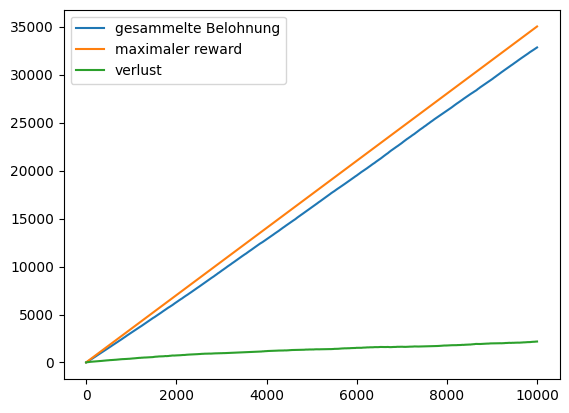

In [49]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means[0]*np.linspace(1, num_of_iter, num_of_iter) + (k-1)*max(means), label='maximaler reward')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

plt.legend()
plt.show()

# d

In [50]:
linear_decay_eps = lambda i, num_of_iterations, eps: eps - (eps/num_of_iterations) * (i-1)
exp_decay_eps = lambda i, num_of_iterations, eps: eps * np.exp(- (i-1))

In [51]:
all_values = np.zeros((k, num_of_iter))
total_reward = np.zeros(num_of_iter)
total_regret = np.zeros(num_of_iter)

for i in range(num_of_avg):
    all_values_i, total_reward_i, total_regret_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev, eps_decay=linear_decay_eps)
    all_values += all_values_i
    total_reward += total_reward_i
    total_regret += total_regret_i

all_values = all_values/num_of_avg
total_reward = total_reward/num_of_avg
total_regret = total_regret/num_of_avg

[9650.  121.  105.  127.]
[9319.  461.  121.  102.]
[9273.  486.  118.  126.]
[9484.  259.  135.  125.]
[7841. 1894.  138.  130.]
[8419. 1308.  136.  140.]
[8958.  778.  140.  127.]
[9618.  151.  115.  119.]
[9295.  443.  133.  132.]
[ 128. 9645.  114.  116.]


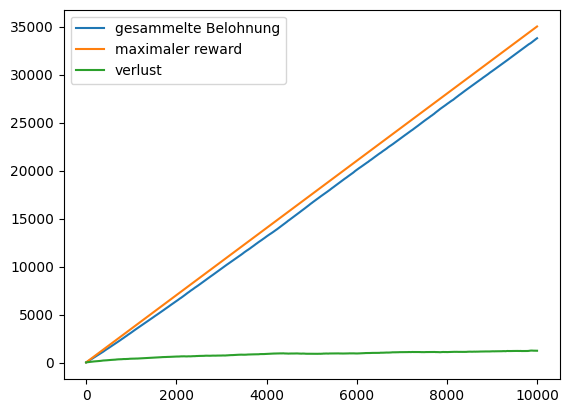

In [52]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means[0]*np.linspace(1, num_of_iter, num_of_iter) + (k-1)*max(means), label='maximaler reward')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

plt.legend()
plt.show()

In [53]:
all_values = np.zeros((k, num_of_iter))
total_reward = np.zeros(num_of_iter)
total_regret = np.zeros(num_of_iter)

for i in range(num_of_avg):
    all_values_i, total_reward_i, total_regret_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev, eps_decay=exp_decay_eps)
    all_values += all_values_i
    total_reward += total_reward_i
    total_regret += total_regret_i

all_values = all_values/num_of_avg
total_reward = total_reward/num_of_avg
total_regret = total_regret/num_of_avg

[1.000e+00 9.999e+03 2.000e+00 1.000e+00]
[1.e+00 1.e+04 1.e+00 1.e+00]
[2.000e+00 9.999e+03 1.000e+00 1.000e+00]
[9.997e+03 4.000e+00 1.000e+00 1.000e+00]
[1.000e+00 9.987e+03 1.000e+00 1.400e+01]
[1.500e+01 9.979e+03 1.000e+00 8.000e+00]
[1.000e+00 9.978e+03 2.000e+00 2.200e+01]
[1.e+00 1.e+04 1.e+00 1.e+00]
[1.e+00 1.e+04 1.e+00 1.e+00]
[4.000e+00 9.997e+03 1.000e+00 1.000e+00]


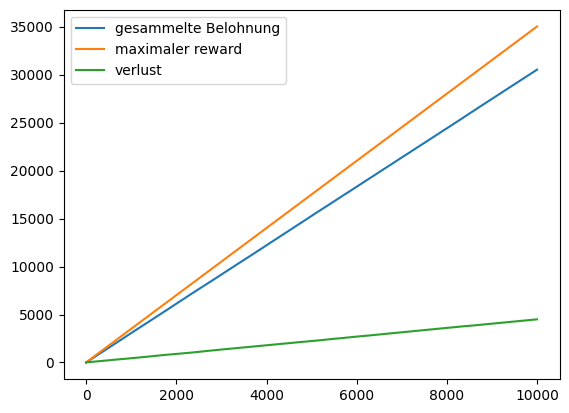

In [54]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means[0]*np.linspace(1, num_of_iter, num_of_iter) + (k-1)*max(means), label='maximaler reward')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

plt.legend()
plt.show()

# Non stationary multi-armed Bandit

In [160]:
def non_stationary_k_armed_bandit(k, num_of_iter, eps, means, std_dev, eps_decay=None):
    means_vec = np.zeros((k,num_of_iter))
    all_values = np.zeros((k, num_of_iter))
    no_of_samples = np.zeros(k)
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)
    best_mean = np.zeros(num_of_iter)
    selected_bandit = np.zeros(num_of_iter)

    for i in range(k):
        all_values[i][0] = np.random.normal(loc=means[i], scale=std_dev[i])
        no_of_samples[i] += 1
        means_vec[i,0] = all_values[i,0]

    total_reward[0] = np.sum(all_values[0, :], axis=0)
    total_regret[0] = k * np.max(means) - total_reward[0]

    if eps_decay is None: 
        eps_decay = lambda i, num_of_iterations, eps: eps

    for i in range(1, num_of_iter):
        means += np.random.normal(loc=0, scale=0.05, size=4)
        best_mean[i] = np.max(means)
        means_vec[:, i] = means.T
        eps_yes_no = np.random.uniform(0,1)

        if eps_yes_no <= eps_decay(i, num_of_iter, eps): 
            current_bandit = int(np.floor(np.random.uniform(0,1) * k))
            selected_bandit[i] = current_bandit
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        else: 
            current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)
            selected_bandit[i] = current_bandit
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        
        total_reward[i] = total_reward[i-1] + all_values[current_bandit, i]
        total_regret[i] = total_regret[i-1] + (np.max(means) - all_values[current_bandit, i])

    print(no_of_samples)
    return all_values, total_reward, total_regret, means_vec, best_mean, selected_bandit

In [166]:
k = 4 
num_of_iter = 10000
eps = 0.3
means = np.array([4.0, 3.0, 2.0, 1.0])
std_dev = np.array([4., 0.5, 1, 6])

num_of_avg = 1

In [167]:
all_values = np.zeros((k, num_of_iter))
total_reward = np.zeros(num_of_iter)
total_regret = np.zeros(num_of_iter)
best_mean = np.zeros(num_of_iter)
means_vec = np.zeros((k,num_of_iter))
selected_bandit = np.zeros(num_of_iter)

for i in range(num_of_avg):
    means = np.array([4.0, 3.0, 2.0, 1])
    all_values_i, total_reward_i, total_regret_i, means_vec_i, best_mean_i, selected_bandit_i = non_stationary_k_armed_bandit(k, num_of_iter,eps,means,std_dev)
    all_values += all_values_i
    total_reward += total_reward_i
    total_regret += total_regret_i
    best_mean += best_mean_i
    means_vec += means_vec_i
    selected_bandit += selected_bandit_i

all_values = all_values/num_of_avg
total_reward = total_reward/num_of_avg
total_regret = total_regret/num_of_avg
best_mean = best_mean/num_of_avg
means_vec = means_vec/num_of_avg
selected_bandit = selected_bandit/num_of_avg

[2965.  733. 5545.  760.]


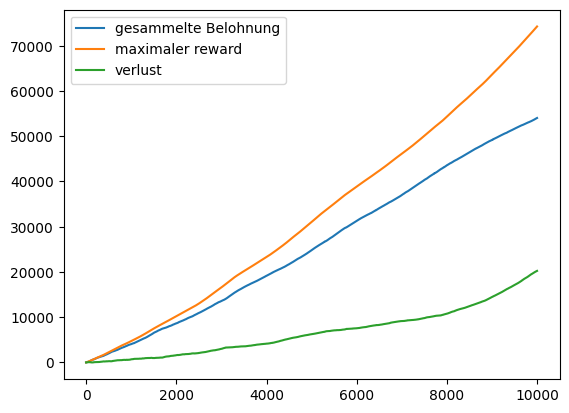

In [168]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), np.cumsum(best_mean), label='maximaler reward')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

plt.legend()
plt.show()


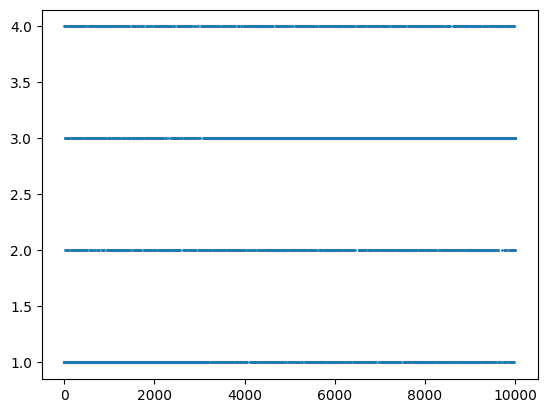

In [169]:
plt.plot(np.linspace(1,num_of_iter - 1, num_of_iter - 1), selected_bandit[1:] + 1, 'o', markersize=1)
plt.show()

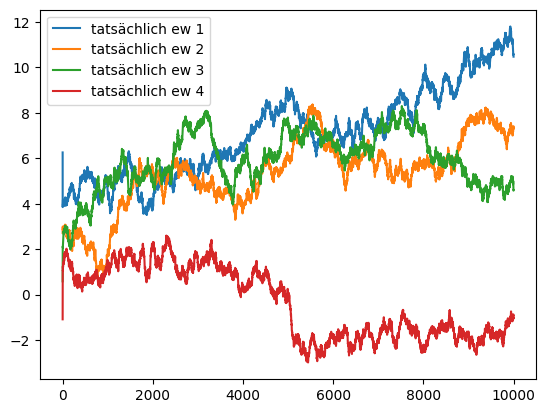

In [170]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[0], label='tatsächlich ew 1')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[1], label='tatsächlich ew 2')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[2], label='tatsächlich ew 3')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[3], label='tatsächlich ew 4')
plt.legend()
plt.show()

c) 

np.array([4, 3, 2, 1])